### 3.2 Dataset Analysis [60m]

#### Tokenization and Stemming

In [ ]:
import json
import random

import pandas as pd
import numpy as np

#NLTK packages
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import ngrams
from nltk.stem import PorterStemmer
from nltk import FreqDist
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS

#Utils
import matplotlib.pyplot as plt
from random import randint
from random import choice

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
with open("reviewSelected100.json", 'r') as read_file:
    data = [json.loads(line) for line in read_file]

In [ ]:
#---------------- Check Business Data ----------------------
'''
Total number of reviews = 15300
Total number of business types = 153
Each business has 100 reviews
'''
biz_type = []
all_biz = []
no_of_reviews = len(data)
for i in range(no_of_reviews):
    b = data[i]['business_id']
    biz_type.append(b)
    
#Store unique business IDs in a list
uniq_biz_type = []
for i in biz_type:
    if i not in uniq_biz_type:
        uniq_biz_type.append(i)

no_biz_type = len(uniq_biz_type)

In [ ]:
def random_biz_select(no_of_reviews, no_biz_type, data):
    #1. Randomly select a business b1 from the dataset
    b1 = uniq_biz_type[randint(0, no_biz_type)] #everytime the code runs a new business_id is chosen

    #2. Extract all reviews for b1 and create a small dataset B1
    B1 = {"small_dataset": []}
    count = 0
    for i in range(no_of_reviews):
        if data[i]['business_id'] == b1:
            count +=1 #must be 100 on every run
            B1['small_dataset'].append(data[i])
            
    #Print Business Information 
    print("------ Business ------")
    print("Business ID: " + str(b1))

    #Consolidated 100 reviews of a randomly chosen business ID
    return B1

In [ ]:
#Stopwords 
yelp_stop_words = set(stopwords.words('english')+ list(ENGLISH_STOP_WORDS))

In [ ]:
#Word frequency before stemming
from nltk import FreqDist

def word_freq(biz_data, disp_count):
    all_reviews = ''
    for i in range(len(biz_data['small_dataset'])):
        all_reviews += biz_data['small_dataset'][i]['text']

    lowercase_review = all_reviews.lower()
    word_tokens = word_tokenize(lowercase_review)

    tokens = list()
    for word in word_tokens:
        if word.isalpha() and word not in yelp_stop_words:
            tokens.append(word)

    token_dist = FreqDist(tokens)
    dist = pd.DataFrame(token_dist.most_common(disp_count),columns=['Word', 'Frequency'])

    return tokens, dist

In [ ]:
#Word frequency after stemming
from nltk.stem import PorterStemmer

def stem_porter(tokens, disp_count):
    porter = PorterStemmer()
    stem_word =[porter.stem(word) for word in tokens]
    stem_word_dist = FreqDist(stem_word)
    stem_dist = pd.DataFrame(stem_word_dist.most_common(disp_count),columns=['Word', 'Frequency'])

    return stem_word, stem_dist

In [ ]:
# Function for display two tables side by side
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2>{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

In [ ]:
#First randomly extracted business review 
biz_data = random_biz_select(no_of_reviews, no_biz_type, data)

------ Business ------
Business ID: l07ctcrDMV--TYwe3uzebQ


In [ ]:
#Number of words to display in dataframe 
disp_count = 10
#Before stemming 
tokens, dist = word_freq(biz_data, disp_count)
#After stemming using porter
stem_word, stem_dist = stem_porter(tokens, disp_count)

### Graph representation of an increase in word length after stemming

In [ ]:
def add_count(no, dict_):
    if dict_.get(no) == None:
        dict_[no] = 1
    else:
        dict_[no] += 1

In [ ]:
word_length = {}
for word in tokens:
    if len(word)<10:
        add_count(len(word), word_length)
word_df = pd.DataFrame(list(word_length.items()),columns = ['Letter Count','Frequency']) 
word_df = word_df.sort_values(by=['Letter Count'])
word_df

,Letter Count,Frequency
8,1,7
7,2,79
4,3,413
0,4,1304
1,5,993
2,6,920
3,7,687
5,8,297
6,9,205


In [ ]:
s_word_length = {}
for s_word in stem_word:
    if len(s_word)<10:
        add_count(len(s_word), s_word_length)
s_word_df = pd.DataFrame(list(s_word_length.items()),columns = ['Letter Count','Frequency']) 
s_word_df = s_word_df.sort_values(by=['Letter Count'])
s_word_df

,Letter Count,Frequency
8,1,7
7,2,97
4,3,559
0,4,1866
1,5,1097
2,6,910
3,7,449
5,8,126
6,9,70


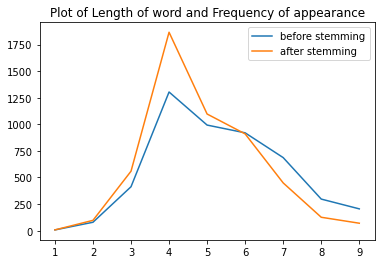

In [ ]:
plt.plot(word_df['Letter Count'], word_df['Frequency'], label='before stemming')
plt.plot(s_word_df['Letter Count'], s_word_df['Frequency'], label='after stemming')
plt.title("Plot of Length of word and Frequency of appearance")
plt.legend()

In [ ]:
display_side_by_side(dist, stem_dist, titles=['Before Stemming','After Stemming'])

,Word,Frequency
0,korean,94
1,food,88
2,good,80
3,place,79
4,dishes,58
5,service,57
6,soup,52
7,restaurant,46
8,"table style=""display:inline""",45
9,like,41


In [ ]:
#Repeat the process for a new business type. 
biz_data = random_biz_select(no_of_reviews, no_biz_type, data)

------ Business ------
Business ID: IzcL0KZPKqMbjoIaCmClog


In [ ]:
disp_count = 10
#Before stemming 
tokens, dist = word_freq(biz_data, disp_count)
#After stemming using porter
stem_word, stem_dist = stem_porter(tokens, disp_count)

In [ ]:
display_side_by_side(dist, stem_dist, titles=['Before Stemming','After Stemming'])

,Word,Frequency
0,range,172
1,shooting,110
2,time,60
3,place,58
4,safety,48
5,great,47
6,like,46
7,people,43
8,shoot,42
9,targets,28


In [ ]:
word_length_2 = {}
for word in tokens:
    if len(word)<10:
        add_count(len(word), word_length_2)
word_df_2 = pd.DataFrame(list(word_length_2.items()),columns = ['Letter Count','Frequency']) 
word_df_2 = word_df_2.sort_values(by=['Letter Count'])


s_word_length_2 = {}
for s_word in stem_word:
    if len(s_word)<10:
        add_count(len(s_word), s_word_length_2)
s_word_df_2 = pd.DataFrame(list(s_word_length_2.items()),columns = ['Letter Count','Frequency']) 
s_word_df_2 = s_word_df_2.sort_values(by=['Letter Count'])

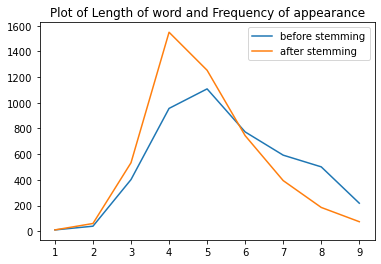

In [ ]:
plt.plot(word_df_2['Letter Count'], word_df_2['Frequency'], label='before stemming')
plt.plot(s_word_df_2['Letter Count'], s_word_df_2['Frequency'], label='after stemming')
plt.title("Plot of Length of word and Frequency of appearance")
plt.legend()

### Conclusion

Generally, by analysing the graphs plotted we notice that there is a gradual decrease in the number of long words. Furthermore, there is a sharp increase in the frequency of length of words in the range 3-5. Longer words tend to reduce more compared to shorter words. 

In addition, according to the comparison tables printed for stemming, the accuracy of stemming is not always 100% as non english words are produced. 